## Assignment 3 by Group 3

#### Team Member: Chuanting Zong, Zizhao Wang, Xinyu Zou

### 1. Load the Lending Club dataset

Load the dataset into a data frame named <b>loans</b>.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from scipy import sparse
%matplotlib inline

In [2]:
loans = pd.read_csv("lending-club-data.csv", index_col = 0, low_memory = False)

In [3]:
loans.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,final_d,last_delinq_none,last_record_none,last_major_derog_none
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,NaN,...,0.4,1.0,1.0,1.0,0,8.14350,20141201T000000,1,1,1
1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,Ryder,...,0.8,1.0,1.0,1.0,1,2.39320,20161201T000000,1,1,1
1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,NaN,...,1.0,1.0,1.0,1.0,0,8.25955,20141201T000000,1,1,1
1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,0.2,1.0,1.0,1.0,0,8.27585,20141201T000000,0,1,1
1075269,1311441,5000,5000,5000,36 months,7.90,156.46,A,A4,Veolia Transportaton,...,0.8,1.0,1.0,1.0,0,5.21533,20141201T000000,1,1,1


In [4]:
len(loans)

122607

In [5]:
len(loans.columns)

67

### 2. Exploring features

Let's quickly explore what the dataset looks like. First, print out the column names to see what features we have in this dataset. Here, we should see that we have some feature columns that have to do with grade of the loan, annual income, home ownership status, etc.

In [6]:
loans.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'is_inc_v', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'not_compliant', 'status', 'inactive_loans', 'bad_loans',
       'emp_length_num', 'grade_num', 'sub_grade_num

### 3. Features for the classification algorithm

In this assignment, we will be using a subset of features (categorical and numeric). The features we will be using are described below. Extract these feature columns and target column from the dataset. We will only use these features.

In [7]:
features = ['grade', 'sub_grade', # sub-grade of the loan 
            'short_emp', # one year or less of employment 
            'emp_length_num', # number of years of employment 
            'home_ownership', # home_ownership status: own, mortgage or rent 
            'dti', # debt to income ratio 
            'purpose', # the purpose of the loan 
            'term', # the term of the loan 
            'last_delinq_none', # has borrower had a delinquincy 
            'last_major_derog_none', # has borrower had 90 day or worse rating 
            'revol_util', # percent of available credit being used 
            'total_rec_late_fee'] # total late fees received to day

In [8]:
loans2 = loans[features]

In [9]:
loans2.isna().sum()

grade                    0
sub_grade                0
short_emp                0
emp_length_num           0
home_ownership           0
dti                      0
purpose                  0
term                     0
last_delinq_none         0
last_major_derog_none    0
revol_util               0
total_rec_late_fee       0
dtype: int64

### 4. Exploring the target column

The target column (label column) of the dataset that we are interested in is called bad_loans. In this column <b>1</b> means a risky (bad) loan <b>0</b> means a safe loan.

(array([99457.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 23150.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

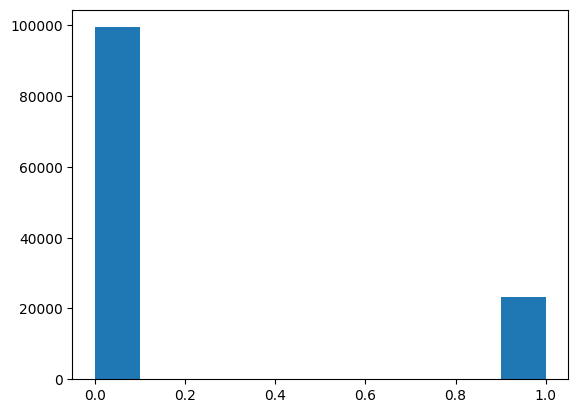

In [10]:
plt.hist(data = loans, x = 'bad_loans')

Now, let us explore the distribution of the target column. This gives us a sense of how many safe and risky loans are present in the dataset. Print out the percentage of safe loans and risky loans in the data frame.

In [11]:
bl = loans.groupby('bad_loans').size()

In [12]:
bl_percent = bl.to_frame()
bl_percent.reset_index(inplace = True)
bl_percent.rename(columns = {0: 'num_of_loan'}, inplace = True)

In [13]:
total = bl_percent.num_of_loan.sum()

In [14]:
bl_percent['Percentage'] = [bl_percent.num_of_loan[0] / total , bl_percent.num_of_loan[1] / total]

In [15]:
bl_percent

,bad_loans,num_of_loan,Percentage
0,0,99457,0.811185
1,1,23150,0.188815


Approximately <b>81%</b> of the loans are considered <i>safe loans</i>.

Therefore, it looks like most of these loans are safe loans (thankfully). But this does make our problem of identifying risky loans challenging.

### 5. Sample data to balance classes

Our data is disproportionally full of safe loans. Let's create two datasets: one with just the safe loans (safe_loans_raw) and one with just the risky loans (risky_loans_raw).

In [16]:
safe_loans_raw = loans[loans['bad_loans'] == 0]

In [17]:
len(safe_loans_raw)

99457

In [18]:
risky_loans_raw = loans[loans['bad_loans'] == 1]

In [19]:
len(risky_loans_raw)

23150

One way to combat class imbalance is to undersample the larger class until the class distribution is approximately half and half. Here, we will undersample the larger class (safe loans) in order to balance out our dataset. This means we are throwing away many data points. We will use seed=1 so everyone gets the same results. Use the following codes for this task.

You can verify now that <b>loans_data</b> is comprised of approximately 50% safe loans and 50% risky loans.

In [22]:
# Since there are fewer risky loans than safe loans, find the ratio of the sizes 
# and use that percentage to undersample the safe loans. 
percentage = len(risky_loans_raw)/float(len(safe_loans_raw))

risky_loans = risky_loans_raw 
safe_loans = safe_loans_raw.sample(frac = percentage, random_state = 1) 

# Append the risky_loans with the downsampled version of safe_loans 
loans_data = pd.concat([risky_loans_raw, safe_loans['bad_loans']], ignore_index=True)


In [23]:
print("Percentage of safe loans:", len(safe_loans) / float(len(loans_data)))
print("Percentage of risky loans:", len(risky_loans) / float(len(loans_data)))
print("Total number of loans in our new dataset:", len(loans_data))

Percentage of safe loans: 0.5
Percentage of risky loans: 0.5
Total number of loans in our new dataset: 46300


### 6. One-hot encoding

For scikit-learn's implementation, it requires numerical values for it's data matrix. This means you will have to turn categorical variables into binary features via one-hot encoding.

### 7. Split data into training and validation and test sets

First, split the original data into train-validate set (90%) and test set (10%) using random state = 0. Then, split the train-validate set into training set (80%) and validation set (20%) using random state = 0.

In [24]:
features2 = ['grade', # grade of the loan 
            'sub_grade', # sub-grade of the loan 
            'short_emp', # one year or less of employment 
            'emp_length_num', # number of years of employment 
            'home_ownership', # home_ownership status: own, mortgage or rent 
            'dti', # debt to income ratio 
            'purpose', # the purpose of the loan 
            'term', # the term of the loan 
            'last_delinq_none', # has borrower had a delinquincy 
            'last_major_derog_none', # has borrower had 90 day or worse rating 
            'revol_util', # percent of available credit being used 
            'total_rec_late_fee', 'bad_loans']

In [25]:
loans_data2 = loans_data[features2]

In [26]:
loans_data2.head()

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,bad_loans
0,C,C4,1.0,1.0,RENT,1.00,car,60 months,1.0,1.0,9.4,0.0,1.0
1,F,F2,0.0,5.0,OWN,5.55,small_business,60 months,1.0,1.0,32.6,0.0,1.0
2,B,B5,1.0,1.0,RENT,18.08,other,60 months,1.0,1.0,36.5,0.0,1.0
3,C,C1,1.0,1.0,RENT,10.08,debt_consolidation,36 months,1.0,1.0,91.7,0.0,1.0
4,B,B2,0.0,4.0,RENT,7.06,other,36 months,1.0,1.0,55.5,0.0,1.0


In [31]:
X = loans_data_new.drop(columns = 'bad_loans')
y = loans_data_new.bad_loans

In [32]:
feature_col = ['emp_length_num', 'dti', 'revol_util', 'total_rec_late_fee',
       'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E',
       'grade_F', 'grade_G', 'sub_grade_A1', 'sub_grade_A2', 'sub_grade_A3',
       'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2',
       'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1',
       'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5',
       'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4',
       'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3',
       'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2',
       'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1',
       'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5',
       'short_emp_0', 'short_emp_1', 'home_ownership_MORTGAGE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_small_business', 'purpose_vacation', 'purpose_wedding',
       'term_ 36 months', 'term_ 60 months', 'last_delinq_none_0',
       'last_delinq_none_1', 'last_major_derog_none_0',
       'last_major_derog_none_1']

In [34]:
X.isna().sum()

emp_length_num               23150
dti                          23150
revol_util                   23150
total_rec_late_fee           23150
grade_A                          0
                             ...  
term_ 60 months                  0
last_delinq_none_0.0             0
last_delinq_none_1.0             0
last_major_derog_none_0.0        0
last_major_derog_none_1.0        0
Length: 70, dtype: int64

In [35]:
y.isna().sum()

23150

In [33]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = 0)

ValueError: Input y contains NaN.

Then, split the train-validate set into training set (80%) and validation set (20%) using random state = 0.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, stratify = y_trainval, test_size = 0.2, random_state = 0)

### 8. Build a decision tree classifier

Build a decision tree classifier with `max_depth = 2` or `6` or `10` using the training set.

Visualize your decision trees.

In [ ]:
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import plot_tree
import graphviz

In [ ]:
tree = DecisionTreeClassifier(max_depth=2, criterion='entropy').fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names = feature_col, filled=True)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="no_pruning", cleanup=True)
graph

In [ ]:
tree = DecisionTreeClassifier(max_depth=6, criterion='entropy').fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names = feature_col, filled=True)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="no_pruning", cleanup=True)
graph

In [ ]:
tree = DecisionTreeClassifier(max_depth=10, criterion='entropy').fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names = feature_col, filled=True)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="no_pruning", cleanup=True)
graph

In [ ]:
X = loans_data2.drop(columns = 'bad_loans')
y = loans_data2.bad_loans

In [ ]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = 0)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, stratify = y_trainval, test_size = 0.2, random_state = 0)

Scaling categorical features

In [ ]:
col_cat = ['grade', 'sub_grade', 'short_emp', 'home_ownership',
       'purpose', 'term', 'last_delinq_none', 'last_major_derog_none']
col_num = ['emp_length_num', 'dti', 'revol_util', 'total_rec_late_fee']

X_train_cat = X_train[col_cat]
X_train_num = X_train[col_num]
X_test_cat = X_test[col_cat]
X_test_num = X_test[col_num]

In [ ]:
pipe_cat = make_pipeline(SimpleImputer(strategy = 'constant'), OneHotEncoder(handle_unknown = 'ignore'))
pipe_num = make_pipeline(StandardScaler(), SimpleImputer())

In [ ]:
preprocessor = make_column_transformer((pipe_cat, col_cat), (pipe_num, col_num))

In [ ]:
pipe = Pipeline([('preprocessing', preprocessor), ('classifier', DecisionTreeClassifier(criterion = "entropy", random_state = 0))])

In [ ]:
param_grid = {'classifier__max_depth': [2, 6, 10]}
grid = GridSearchCV(pipe, param_grid = param_grid, cv = 5, return_train_score=True)
grid.fit(X_train, y_train)

accuracy = grid.score(X_val, y_val)
print(grid.best_params_)
print('Accuracy score of the {} is {:.3f}'.format(grid.__class__.__name__, accuracy))

<b>OR</b>

Decision Tree Classifier `max_depth = 2`

In [ ]:
param_grid = {'classifier__max_depth': [2]}
grid_two = GridSearchCV(pipe, param_grid = param_grid, cv = 5, return_train_score=True)
grid_two.fit(X_train, y_train)

accuracy = grid_two.score(X_val, y_val)
print('Accuracy score of the {} is {:.3f}'.format(grid_two.__class__.__name__, accuracy))

Decision Tree Classifier `max_depth = 6`

In [ ]:
param_grid = {'classifier__max_depth': [6]}
grid_six = GridSearchCV(pipe, param_grid = param_grid, cv = 5, return_train_score=True)
grid_six.fit(X_train, y_train)

accuracy = grid_six.score(X_val, y_val)
print('Accuracy score of the {} is {:.3f}'.format(grid_six.__class__.__name__, accuracy))

Decision Tree Classifier `max_depth = 10`

In [ ]:
param_grid = {'classifier__max_depth': [10]}
grid_ten = GridSearchCV(pipe, param_grid = param_grid, cv = 5, return_train_score=True)
grid_ten.fit(X_train, y_train)

accuracy = grid_ten.score(X_val, y_val)
print('Accuracy score of the {} is {:.3f}'.format(grid_ten.__class__.__name__, accuracy))

<b><i>The performance was the best with the max_depth as 6.

In [ ]:
accuracy = grid_six.score(X_test, y_test)
print('Accuracy score of the {} is {:.3f}'.format(grid_six.__class__.__name__, accuracy))

### 9. Explore probability predictions

For each row in the <b>validation set</b>, what is the probability (using the best model from the previous comparisons) of a loan being classified as safe? (Hint: if you are using scikit-learn, you can use the .predict_proba() method)
<br>
<br>
Which loan has the highest probability of being classified as a <b>safe loan</b>?

<b>0 = Safe Loans</b> and <b>1 = Risky Loans</b>

In [ ]:
predictions = pd.DataFrame(grid_six.predict_proba(X_val), columns = grid_six.classes_)

In [ ]:
predictions.rename(columns = {0: 'Safe_Loans', 1: 'Risky_Loans'}, inplace = True)

There are 5 loans that have the highest probability of being classified as a <b>safe loan</b>.

In [ ]:
predictions.sort_values(by = ['Safe_Loans'], ascending = False).head()

In [ ]:
loans_data2.reset_index(inplace = True)

In [ ]:
loans_data2.loc[[5684, 762, 6453, 5110, 401]]

It seems like id `990043` could be the safest as the debt to income ratio (dti) is the lowest indicating a higher likelihood of paying back the loan.

### 10. Build a SVM classifier

Use 5-fold GridSearchCV on the train-validate set. Build a kernelized SVM classifier (preprocessing the data with MinMaxScaler) with rbf kernel and compare hyperparameters in the following grid:
<br>
<br>
`C: np.logspace(-3, 3, 7), gamma: np.logspace(-3, 3, 7) / X_train.shape[0]`
<br>
<br>
Report the best model’s performance on the test set.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

In [ ]:
pipe_cat = make_pipeline(SimpleImputer(strategy = 'constant'), OneHotEncoder(handle_unknown = 'ignore'))
pipe_num_svm = make_pipeline(MinMaxScaler(), SimpleImputer())

In [ ]:
preprocessor_svm = make_column_transformer((pipe_cat, col_cat), (pipe_num_svm, col_num))

In [ ]:
pipe_svc = Pipeline([('preprocessing', preprocessor_svm), ('classifier', SVC(kernel = 'rbf'))])

In [ ]:
np.set_printoptions(precision = 6, suppress = True)
param_grid = {'classifier__C': np.logspace(-2, 2, 2),
              'classifier__gamma': np.logspace(-2, 2, 2) / X_train.shape[0]}

In [ ]:
grid = GridSearchCV(pipe_svc, param_grid = param_grid, cv = 5, return_train_score = True)
grid.fit(X_trainval, y_trainval)

In [ ]:
grid.best_params_

In [ ]:
accuracy = grid.score(X_test, y_test)
print('Accuracy score of the {} is {:.3f}'.format(grid.__class__.__name__, accuracy))

### 11. Build a random forest classifier

Use 5-fold GridSearchCV on the train-validate set. Build a random forest classifier and compare hyperparameters in the following grid: 
<br>
<br>
<i>max_features: [2, 4, 6, 8, 10], max_depth: [6, 8, 10, 12, 14]</i>
<br>
<br>
Report the best model’s performance on the test set.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pipe_cat = make_pipeline(SimpleImputer(strategy = 'constant'), OneHotEncoder(handle_unknown = 'ignore'))
pipe_num = make_pipeline(StandardScaler(), SimpleImputer())

In [ ]:
preprocessor = make_column_transformer((pipe_cat, col_cat), (pipe_num, col_num))

In [ ]:
pipe_rf = Pipeline([('preprocessing', preprocessor), ('classifier', RandomForestClassifier())])

In [ ]:
param_grid = {'classifier__max_features': [2, 4, 6, 8, 10],
              'classifier__max_depth': [6, 8, 10, 12, 14]}

In [ ]:
grid = GridSearchCV(pipe_rf, param_grid = param_grid, cv = 5, return_train_score=True)
grid.fit(X_trainval, y_trainval)

grid.best_params_

In [ ]:
accuracy = grid.score(X_test, y_test)
print('Accuracy score of the {} is {:.3f}'.format(grid.__class__.__name__, accuracy))

### 12. Build a gradient boosting classifier

Use 5-fold GridSearchCV on the train-validate set. Build a gradient boosted tree classifier (fixing max_depth = 6) and compare hyperparameters in the following grid:
<br>
<br>
<i>learning_rate: np.logspace(-2, 0, 3), n_estimators: [5, 10, 50, 100, 200, 500]</i>
<br>
<br>
Report the best model’s performance on the test set.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
pipe_gb = Pipeline([('preprocessing', preprocessor), ('classifier', GradientBoostingClassifier(max_depth = 6))])

** Didn't use the code below because it took too long to load (wouldn't load after 1 hour)

In [ ]:
#param_grid = {'classifier__learning_rate': np.logspace(-2, 0, 3),
              #'classifier__n_estimators': [5, 10, 50, 100, 200, 500]}

** Reduced the number of estimators to run the code faster

In [ ]:
param_grid = {'classifier__learning_rate': np.logspace(-2, 0, 3),
              'classifier__n_estimators': [5, 10, 50, 100]}

In [ ]:
grid = GridSearchCV(pipe_gb, param_grid = param_grid, cv = 5, return_train_score=True)
grid.fit(X_trainval, y_trainval)

accuracy = grid.score(X_test, y_test)
print('Accuracy score of the {} is {:.3f}'.format(grid.__class__.__name__, accuracy))

### 13. XGBoost, LightGBM, and CatBoost

Try <b>XGBoost</b>, <b>LightGBM</b>, and <b>CatBoost</b> and see if you can get further improvement. 
<br>Report the best model’s performance on the test set.

In [ ]:
from xgboost import XGBClassifier

In [ ]:
pipe_xboost = Pipeline([('preprocessing', preprocessor), ('classifier', XGBClassifier(eval_metric='mlogloss', use_label_encoder =False))])

In [ ]:
param_grid = {'classifier__gamma': [0.001, 0.01, 0.1, 1, 10],
              'classifier__n_estimators': [100, 200, 300]}

In [ ]:
grid = GridSearchCV(pipe_xboost, param_grid = param_grid, cv = 5, return_train_score=True)
grid.fit(X_trainval, y_trainval)

In [ ]:
accuracy = grid.score(X_test, y_test)
print('Accuracy score of the {} is {:.3f}'.format(grid.__class__.__name__, accuracy))

** lightgbm installation on macOS:
<br>1. Downgrade pip to 19.3.4
<br>2. Run `pip install open-mpi`
<br>3. Then run `brew install lightgbm`
<br>4. Finally run `pip install lightgbm`

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
pipe_lightgbm = Pipeline([('preprocessing', preprocessor), ('classifier', LGBMClassifier())])

In [ ]:
param_grid = {'classifier__max_depth': [2, 6, 8],
              'classifier__n_estimators': [100, 1000, 5000]}

In [ ]:
grid = GridSearchCV(pipe_lightgbm, param_grid = param_grid, cv = 5, return_train_score=True)
grid.fit(X_trainval, y_trainval)

In [ ]:
accuracy = grid.score(X_test, y_test)
print('Accuracy score of the {} is {:.3f}'.format(grid.__class__.__name__, accuracy))

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
pipe_catboost = Pipeline([('preprocessing', preprocessor), ('classifier', CatBoostClassifier())])

In [ ]:
param_grid = {'classifier__learning_rate': [0.01, 0.1, 1]}

In [ ]:
grid = GridSearchCV(pipe_catboost, param_grid = param_grid, cv = 5, return_train_score=True)
grid.fit(X_trainval, y_trainval)

In [ ]:
accuracy = grid.score(X_test, y_test)
print('Accuracy score of the {} is {:.3f}'.format(grid.__class__.__name__, accuracy))

<b>Scores of each of the models</b>

SVM = 63%
<br>Random Forest Classifier = 65.1%
<br>Gradient Boosting Classifier = 64.7%
<br>XGBoost = 64.7%
<br>LightGBM = 65.1%
<br>Cat Boost Classifier = 65%

### 14. Final Evaluation

<i>After all the comparisons, which model will you select?

The Random Forest Classifier and LightGBM models had the highest scores of 65.1% while the SVM model had the lowest of 63%.